In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
main_df = pd.read_csv('/Users/miti/Documents/EXETER/Learning from Data/Coursework/finalDataStudy3.csv', sep=",", encoding="ISO-8859-1", header=0)
main_df = main_df.iloc[: , 1:]

In [4]:
main_df

,CloseUSD,Volume,High,Low,Open,Close,isRecession,isUpOrDown
0,333.879006,0.0,2568.300049,2568.300049,2568.300049,2568.300049,0.0,0.0
1,330.213013,0.0,2540.100098,2540.100098,2540.100098,2540.100098,0.0,0.0
2,331.811987,0.0,2552.399902,2552.399902,2552.399902,2552.399902,0.0,1.0
3,335.906987,0.0,2583.899902,2583.899902,2583.899902,2583.899902,0.0,1.0
4,338.923013,0.0,2607.100098,2607.100098,2607.100098,2607.100098,0.0,1.0
...,...,...,...,...,...,...,...,...
104219,4625.367578,0.0,66812.453130,66022.976560,66054.921880,66076.679690,0.0,1.0
104220,4627.575859,0.0,66446.367190,66030.351560,66076.679690,66108.226560,0.0,1.0
104221,4685.817500,0.0,66940.250000,66102.546880,66108.226560,66940.250000,0.0,1.0
104222,4728.840157,0.0,67726.562500,66794.609380,66940.250000,67554.859380,0.0,1.0


Normalize values


In [1]:
main_df_copy = main_df.copy()

NameError: name 'main_df' is not defined

In [5]:
main_df_copy

,CloseUSD,Volume,High,Low,Open,Close,isRecession,isUpOrDown
0,333.879006,0.0,2568.300049,2568.300049,2568.300049,2568.300049,0.0,0.0
1,330.213013,0.0,2540.100098,2540.100098,2540.100098,2540.100098,0.0,0.0
2,331.811987,0.0,2552.399902,2552.399902,2552.399902,2552.399902,0.0,1.0
3,335.906987,0.0,2583.899902,2583.899902,2583.899902,2583.899902,0.0,1.0
4,338.923013,0.0,2607.100098,2607.100098,2607.100098,2607.100098,0.0,1.0
...,...,...,...,...,...,...,...,...
104219,4625.367578,0.0,66812.453130,66022.976560,66054.921880,66076.679690,0.0,1.0
104220,4627.575859,0.0,66446.367190,66030.351560,66076.679690,66108.226560,0.0,1.0
104221,4685.817500,0.0,66940.250000,66102.546880,66108.226560,66940.250000,0.0,1.0
104222,4728.840157,0.0,67726.562500,66794.609380,66940.250000,67554.859380,0.0,1.0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit_transform
main_df_copy = scaler.fit_transform(main_df_copy)
main_df_columns = []
for col in main_df.columns:
    main_df_columns.append(col)

main_df_copy = pd.DataFrame(main_df_copy)
main_df_copy.columns = main_df_columns
main_df_copy

,CloseUSD,Volume,High,Low,Open,Close,isRecession,isUpOrDown
0,-0.723842,-0.304371,-0.597510,-0.593906,-0.595924,-0.595813,-0.229967,-1.063188
1,-0.724820,-0.304371,-0.600577,-0.597010,-0.599009,-0.598898,-0.229967,-1.063188
2,-0.724394,-0.304371,-0.599239,-0.595656,-0.597663,-0.597552,-0.229967,0.940568
3,-0.723301,-0.304371,-0.595814,-0.592188,-0.594217,-0.594106,-0.229967,0.940568
4,-0.722496,-0.304371,-0.593292,-0.589634,-0.591679,-0.591568,-0.229967,0.940568
...,...,...,...,...,...,...,...,...
104219,0.421212,-0.304371,6.388183,6.392399,6.349701,6.352157,-0.229967,0.940568
104220,0.421801,-0.304371,6.348376,6.393211,6.352082,6.355609,-0.229967,0.940568
104221,0.437341,-0.304371,6.402079,6.401159,6.355533,6.446634,-0.229967,0.940568
104222,0.448821,-0.304371,6.487580,6.477355,6.446559,6.513874,-0.229967,0.940568


In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



X_train,X_test,Y_train,Y_test = train_test_split(main_df[["Close", "High", "Low", "Open", "isUpOrDown"]],main_df["isRecession"],test_size=0.3)
clf = MLPClassifier(hidden_layer_sizes=13)
clf.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
accuracy_score(clf.predict(X_test),Y_test,)
scores = cross_val_score(clf, X_test, Y_test, cv=5)

print(scores.mean())



/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9479981134479178


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:110

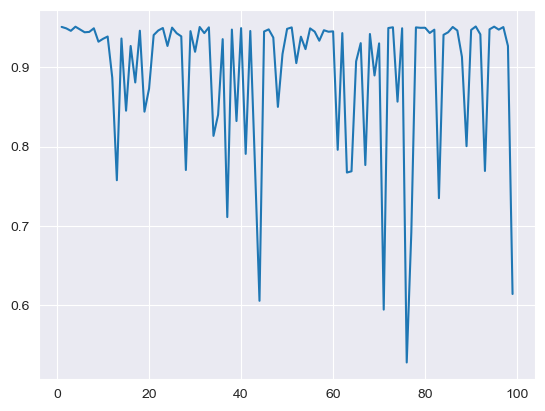

In [30]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


y=[]
x = range(1,100)
for i in x:
    X_train,X_test,Y_train,Y_test = train_test_split(main_df[["Close", "High", "Low", "Open", "isUpOrDown"]],main_df["isRecession"],test_size=0.3)
    clf = MLPClassifier(hidden_layer_sizes=i)
    sc=StandardScaler()
    scaler = sc.fit(X_train)
    trainX_scaled = scaler.transform(X_train)
    testX_scaled = scaler.transform(X_test)

    clf.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
    accuracy_score(clf.predict(X_test),Y_test,)
    scores = cross_val_score(clf, X_test, Y_test, cv=5)
    y.append(scores.mean())

plt.plot(x,y)




MLPClassifier()
0.950428557963428
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     29728
         1.0       0.00      0.00      0.00      1540

    accuracy                           0.95     31268
   macro avg       0.48      0.50      0.49     31268
weighted avg       0.90      0.95      0.93     31268

[[29728     0]
 [ 1540     0]]


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miti/opt/anacon

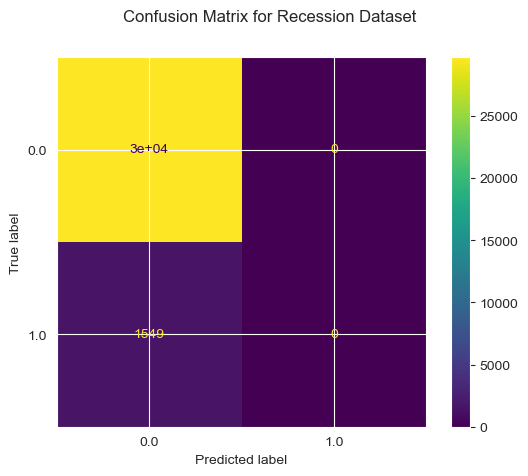

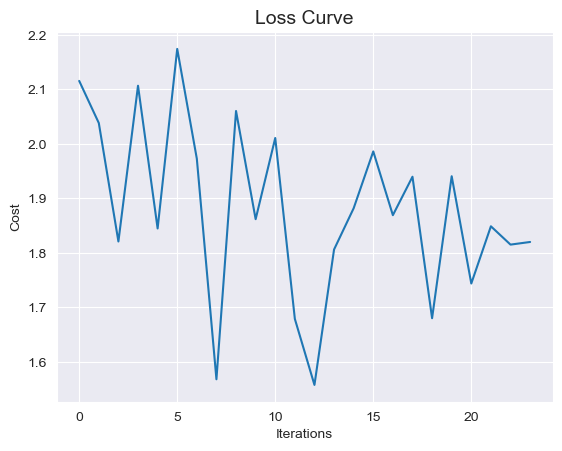

In [21]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X = main_df[["Close", "High", "Low", "Open", "isUpOrDown"]]; y = main_df["isRecession"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = MLPClassifier()
model.fit(X_train, y_train)
print(model)

scores = cross_val_score(model, X_test, Y_test, cv=5)
print(scores.mean())

expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

fig = plot_confusion_matrix(model,  X_test, Y_test, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for Recession Dataset")
plt.show()

plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
dataset = main_df
X = main_df[["Close", "High", "Low", "Open", "isUpOrDown"]]; y = main_df["isRecession"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()
0.9489254227366452
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     29660
         1.0       0.50      0.00      0.00      1608

    accuracy                           0.95     31268
   macro avg       0.72      0.50      0.49     31268
weighted avg       0.93      0.95      0.92     31268

[[29659     1]
 [ 1607     1]]


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


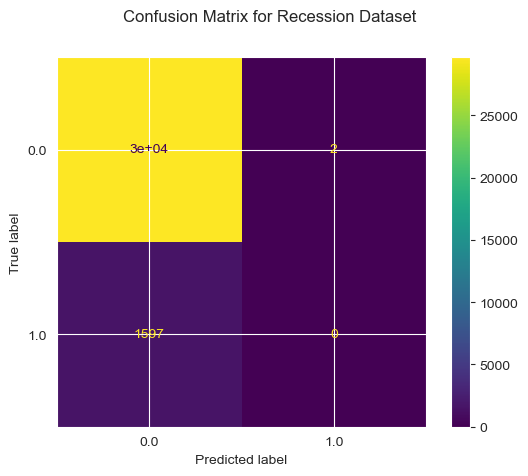

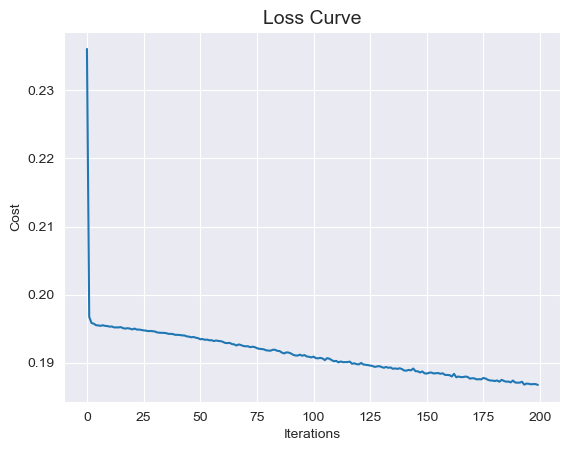

In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



X = main_df[["Close", "High", "Low", "Open", "isUpOrDown"]]; y = main_df["isRecession"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

model = MLPClassifier()
model.fit(trainX_scaled, y_train)
print(model)

scores = cross_val_score(model, testX_scaled, Y_test, cv=5)
print(scores.mean())

expected_y  = y_test
predicted_y = model.predict(testX_scaled)

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

fig = plot_confusion_matrix(model,  testX_scaled, Y_test, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for Recession Dataset")
plt.show()

plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()